<a href="https://colab.research.google.com/github/HammadN98/previsao_de_vendas/blob/main/previsao_das_vendas_lojas_Rossmann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Importacoes

In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from timeit import default_timer as timer

In [7]:
store = pd.read_csv("https://raw.githubusercontent.com/HammadN98/previsao_de_vendas/refs/heads/main/rossmann-store-sales/store.csv")
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [8]:
train = pd.read_csv("https://raw.githubusercontent.com/HammadN98/previsao_de_vendas/refs/heads/main/rossmann-store-sales/train.csv")
train.head()

<ipython-input-8-24519896a09f>:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("https://raw.githubusercontent.com/HammadN98/previsao_de_vendas/refs/heads/main/rossmann-store-sales/train.csv")


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [9]:
test = pd.read_csv("https://raw.githubusercontent.com/HammadN98/previsao_de_vendas/refs/heads/main/rossmann-store-sales/test.csv")
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


juntar os datasets para garantir ter todas as variaveis disponiveis

In [10]:
#Dimensoes pre-merge
store.shape, train.shape, test.shape

((1115, 10), (1017209, 9), (41088, 8))

In [11]:
train = train.merge(store, on='Store', how='left')
train.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [12]:
test = test.merge(store, on='Store', how='left')
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN


In [13]:
#Dimensoes pOS-merge
train.shape, test.shape


((1017209, 18), (41088, 17))

## 1. Analise Exploratoria

### 1.1 Valores ausentes

In [14]:
#Valores ausentes por coluna no train
train.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [15]:
#Valores ausentes por coluna no test
test.isnull().sum()

,0
Id,0
Store,0
DayOfWeek,0
Date,0
Open,11
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0
Assortment,0


A coluna usada como base para o merge ficou com 0 NaN

In [16]:
#PErcentual de valores ausentes por coluna
print(train.isnull().mean() * 100)
print(test.isnull().mean() * 100)


Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.259730
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64
Id                            0.000000
Store                         0.000000
DayOfWeek                     0.000000
Date                          0.000000
Open                          0.026772
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoli

OS valores faltantes serao substituidos por:

CompetitionDistance -> Mediana

Open -> 0 / A loja devia estar fechada

CompetitionOpenSinceMonth, CompetitionOpenSinceYear -> 0 / indica que nao tem competidores proximos

Promo2SinceWeek, Promo2SinceYear, PromoInterval -> 0 / A loja nao participas das promocoes

In [17]:
train['CompetitionDistance']

,CompetitionDistance
0,1270.0
1,570.0
2,14130.0
3,620.0
4,29910.0
...,...
1017204,1900.0
1017205,1880.0
1017206,9260.0
1017207,870.0


In [18]:
# NaN -> MEdiana
median_value_train = train['CompetitionDistance'].median()
train['CompetitionDistance'] = train['CompetitionDistance'].fillna(median_value_train)
median_value_test = test['CompetitionDistance'].median()
test['CompetitionDistance'] = test['CompetitionDistance'].fillna(median_value_test)

# NaN -> 0
train['CompetitionOpenSinceMonth'] = train['CompetitionOpenSinceMonth'].fillna(0)
test['CompetitionOpenSinceMonth'] = test['CompetitionOpenSinceMonth'].fillna(0)

train['CompetitionOpenSinceYear'] = train['CompetitionOpenSinceYear'].fillna(0)
test['CompetitionOpenSinceYear'] = test['CompetitionOpenSinceYear'].fillna(0)

train['Promo2SinceWeek'] = train['Promo2SinceWeek'].fillna(0)
test['Promo2SinceWeek'] = test['Promo2SinceWeek'].fillna(0)

train['Promo2SinceYear'] = train['Promo2SinceYear'].fillna(0)
test['Promo2SinceYear'] = test['Promo2SinceYear'].fillna(0)

# NaN -> 'None'
train['PromoInterval'] = train['PromoInterval'].fillna('None')
test['PromoInterval'] = test['PromoInterval'].fillna('None')

test['Open'] = test['Open'].fillna(0)

In [19]:
print("Valores ausentes após o tratamento (train):")
print(train.isnull().sum())

Valores ausentes após o tratamento (train):
Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


In [20]:
print("\nValores ausentes após o tratamento (test):")
print(test.isnull().sum())


Valores ausentes após o tratamento (test):
Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64


Dados faltantes tratados

## 2. Analise Descritiva

In [21]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,5.422034e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.706913e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.330000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,7.586000e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


#### Insights:

Store: Vai de 1 a 1115, indicando 1115 loja unicas.

DayOfWeek: VAi de 1 (Segunda) a 7 (Domingo).

Sales: VEndas minimas = 0, possivelvente a loja estava fechada, a media fica em 5773.82, com um desvio padrao de 3849.93 o que indica uma altissima variacao. E tando o maximo em 41,551.

Custumers: MIN -> 0(Loja fechada possivelmente). Media -> 633. Dp -> 464, indicando alta variacao.  MAX -> 7388.

Promo: A media indica que 38% dos dados tem promocoes em atividade.

Promo2: A media indica que +50% nao participa das promocoes 2

CompetitionDistance: MIN -> 2km indica proximidade de concorrentes, Media -> 5,4km. MAX -> 75km, lojas mais isoladas.

CompetitionOpenSinceYear -> OS valores 0, puxaram a media para 1370. Indicando que a escolha da codificacao nao foi efetiva. Retomar a esse ponto.

Open: 83% da lojas abertas

Holiday(School e State): Grande maioria 0, o que era esperado.






### 2. 1 Validando `CompetitionOpenSinceYear`

In [22]:
print("Valores únicos de CompetitionOpenSinceYear:")
print(train['CompetitionOpenSinceYear'].value_counts().sort_index())

print("\nAno mínimo e máximo:")
print("Mínimo:", train['CompetitionOpenSinceYear'].min())
print("Máximo:", train['CompetitionOpenSinceYear'].max())

Valores únicos de CompetitionOpenSinceYear:
CompetitionOpenSinceYear
0.0       323348
1900.0       758
1961.0       942
1990.0      4710
1994.0      1884
1995.0      1700
1998.0       942
1999.0      7352
2000.0      9236
2001.0     14704
2002.0     24882
2003.0     16794
2004.0     19804
2005.0     56564
2006.0     42802
2007.0     43744
2008.0     48476
2009.0     49396
2010.0     51258
2011.0     49396
2012.0     74299
2013.0     75426
2014.0     63732
2015.0     35060
Name: count, dtype: int64

Ano mínimo e máximo:
Mínimo: 0.0
Máximo: 2015.0


os valores em zero, serao substituidos pela mediana, e sera criada uma nova categoria, binaria, para indicar quais sao as lojas que nao possuiam informacao.

In [23]:
#Substituir 0 -> NaN
train['CompetitionOpenSinceYear'] = train['CompetitionOpenSinceYear'].replace(0, np.nan)

In [24]:
#CRiando a nova coluna
train['CompetitionMissing'] = train['CompetitionOpenSinceYear'].isna().astype(int)

In [25]:
#Ausentes -> mediana (2010)
mediana_year = train['CompetitionOpenSinceYear'].median()
train['CompetitionOpenSinceYear'] = train['CompetitionOpenSinceYear'].fillna(mediana_year)

In [26]:
train[['CompetitionOpenSinceYear', 'CompetitionMissing']]

,CompetitionOpenSinceYear,CompetitionMissing
0,2008.0,0
1,2007.0,0
2,2006.0,0
3,2009.0,0
4,2015.0,0
...,...,...
1017204,2014.0,0
1017205,2006.0,0
1017206,2010.0,1
1017207,2010.0,1


In [27]:
#Para os dados de teste tbm

#Substituir 0 -> NaN
test['CompetitionOpenSinceYear'] = test['CompetitionOpenSinceYear'].replace(0, np.nan)

#CRiando a nova coluna
test['CompetitionMissing'] =test['CompetitionOpenSinceYear'].isna().astype(int)

#Ausentes -> mediana
mediana_year_test = test['CompetitionOpenSinceYear'].median()
test['CompetitionOpenSinceYear'] = test['CompetitionOpenSinceYear'].fillna(mediana_year_test)

test[['CompetitionOpenSinceYear', 'CompetitionMissing']]

,CompetitionOpenSinceYear,CompetitionMissing
0,2008.0,0
1,2006.0,0
2,2013.0,0
3,2014.0,0
4,2000.0,0
...,...,...
41083,2014.0,0
41084,2006.0,0
41085,2010.0,1
41086,2010.0,1


### 2.2 Analisando as variaveis categoricas

In [28]:
cat_columns = train.select_dtypes(include='object').columns
cat_columns

Index(['Date', 'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

In [29]:
for categorica in cat_columns:
    print(f"{train[categorica].value_counts()}\n")

Date
2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: count, Length: 942, dtype: int64

StateHoliday
0    855087
0    131072
a     20260
b      6690
c      4100
Name: count, dtype: int64

StoreType
a    551627
d    312912
c    136840
b     15830
Name: count, dtype: int64

Assortment
a    537445
c    471470
b      8294
Name: count, dtype: int64

PromoInterval
None                508031
Jan,Apr,Jul,Oct     293122
Feb,May,Aug,Nov     118596
Mar,Jun,Sept,Dec     97460
Name: count, dtype: int64



StateHoliday: Possui dois zeros. PRovalemnete um numerico e outro string
StoreType: ok
Assoretment: ok
PromoInterval: ok
As variaveis categoricas quando estiverem ok, ainda precisam ser transformadas para variaveis numericas.


##### 2.2.2 REsolvendo as inconsistencias em StateHoliday

In [30]:
train['StateHoliday'] = train['StateHoliday'].astype(str).replace('0.0', '0')
test['StateHoliday'] = test['StateHoliday'].astype(str).replace('0.0', '0')

In [31]:
train['StateHoliday'].value_counts()

,count
StateHoliday,
0,986159
a,20260
b,6690
c,4100


### 2.3 Transformando as Variaveis Categoricas

Sera utilizado o One-Hot

In [32]:
train_one_hot = pd.get_dummies(train, columns=['StateHoliday'], prefix='StateHoliday', drop_first=True)
train_one_hot = pd.get_dummies(train_one_hot, columns=['PromoInterval'], prefix='PromoInterval', drop_first=True)
train_one_hot = pd.get_dummies(train_one_hot, columns=['StoreType'], prefix='StoreType', drop_first=True)
train_one_hot = pd.get_dummies(train_one_hot, columns=['Assortment'], prefix='Assortment', drop_first=True)


In [33]:
test['StateHoliday'].unique()

array(['0', 'a'], dtype=object)

In [34]:
#test_one_hot = pd.get_dummies(test, columns=['StateHoliday'], prefix='StateHoliday', drop_first=True)
#test_one_hot = pd.get_dummies(test_one_hot, columns=['PromoInterval'], prefix='PromoInterval', drop_first=True)
#test_one_hot = pd.get_dummies(test_one_hot, columns=['StoreType'], prefix='StoreType', drop_first=True)
#test_one_hot = pd.get_dummies(test_one_hot, columns=['Assortment'], prefix='Assortment', drop_first=True)
test_one_hot = pd.get_dummies(test, columns=['StateHoliday', 'PromoInterval', 'StoreType', 'Assortment'], drop_first=True)


In [35]:
train_one_hot.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionMissing', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'PromoInterval_Jan,Apr,Jul,Oct',
       'PromoInterval_Mar,Jun,Sept,Dec', 'PromoInterval_None', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [36]:
test_one_hot.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'CompetitionMissing', 'StateHoliday_a',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec',
       'PromoInterval_None', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

In [37]:
print(f"Train: \n\n{train_one_hot.dtypes}")
print(f"Test: \n\n{test_one_hot.dtypes}")

Train: 

Store                               int64
DayOfWeek                           int64
Date                               object
Sales                               int64
Customers                           int64
Open                                int64
Promo                               int64
SchoolHoliday                       int64
CompetitionDistance               float64
CompetitionOpenSinceMonth         float64
CompetitionOpenSinceYear          float64
Promo2                              int64
Promo2SinceWeek                   float64
Promo2SinceYear                   float64
CompetitionMissing                  int64
StateHoliday_a                       bool
StateHoliday_b                       bool
StateHoliday_c                       bool
PromoInterval_Jan,Apr,Jul,Oct        bool
PromoInterval_Mar,Jun,Sept,Dec       bool
PromoInterval_None                   bool
StoreType_b                          bool
StoreType_c                          bool
StoreType_d              

#### 2.3.1 TRansformando a coluna 'Date':

String -> Date

Pela necessiade de normalizacao que alguns modelo sensiveis a escala necessitam

In [38]:
train_one_hot['Date']

,Date
0,2015-07-31
1,2015-07-31
2,2015-07-31
3,2015-07-31
4,2015-07-31
...,...
1017204,2013-01-01
1017205,2013-01-01
1017206,2013-01-01
1017207,2013-01-01


In [39]:
train_one_hot['Date'] = pd.to_datetime(train_one_hot['Date'])
test_one_hot['Date'] = pd.to_datetime(test_one_hot['Date'])

In [40]:
train_one_hot['Year'] = train_one_hot['Date'].dt.year
train_one_hot['Month'] = train_one_hot['Date'].dt.month
train_one_hot['Day'] = train_one_hot['Date'].dt.day
train_one_hot = train_one_hot.drop(columns='Date')

test_one_hot['Year'] = test_one_hot['Date'].dt.year
test_one_hot['Month'] = test_one_hot['Date'].dt.month
test_one_hot['Day'] = test_one_hot['Date'].dt.day
test_one_hot = test_one_hot.drop(columns='Date')

### 2.4 Criando `StateHoliday_b` `StateHoliday_c`

Como no conjunto de teste nao houve valores correspondentes, as colunas nao foram criadas no dummie. Logo sera necessaria a criacao de maneira sintetica e com valores zeros.

In [41]:
sinteticas = ['StateHoliday_b', 'StateHoliday_c']
for col in sinteticas:
  test_one_hot[col] = 0

### 3. Preparacao dos conjuntos de dados

1. Remover a coluna 'sales' para X_train
2. criar y_train
3. Remover a coluna Id de test
4. Confirmar consistencia das colunas dos conjuntos

#### 3.1 COluna 'Sales'

In [42]:
X_train = train_one_hot.drop(columns=['Sales'])

#### 3.2 Criando y_train

In [43]:
y_train = train_one_hot['Sales']

#### 3.4 Remover Id

In [44]:
X_test = test_one_hot.drop(columns=['Id'])
#y_test = test_one_hot.drop(columns=['Sales'])

#### 3.5 Garantindo Consistencia dos dados

In [45]:
#X_test = X_test[X_train.columns] #Remover 'Custumers'


##### 3.5.1 Removendo 'Custumers' do treino.

Estrategia 1:
Devido a varivel so estar presente em um dos conjuntos de dados.

Estrategia 2:
Seria possivel prever custumers para os dados de test, caso houvesse uma correlacao forte com Promo e/ou Sales. Porem esta estrategia adicionaria certa complexidade ao modelo, e so seria benefca se custumers melhorasse o desempenho do modelo.

In [46]:
X_train = X_train.drop(columns=['Customers'])

In [47]:
#Deixa bonitinho na mesma ordem
X_test = X_test[X_train.columns]

### 3.6 Normalizacao dos dados



In [48]:
#X_train_stand = X_train.drop(columns='Date')

In [49]:
scaler = StandardScaler()
X_train_stand = scaler.fit_transform(X_train)
X_test_stand = scaler.fit_transform(X_test)


#### 3.7 Divisao do `Train`

Train -> train 80% / val 20%

In [50]:
X_train_modelo, X_val_modelo, y_train_modelo, y_val_modelo = train_test_split(
    X_train_stand, y_train, test_size=0.2, shuffle=True, random_state=42
)

In [ ]:
X_train_modelo.shape

(813767, 26)

### 4. Modelagem

Nesta etapa serao criados 4 modelos

* Regressao linear -> Base model
* SVR
* Random Frorest
* XGBoost

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

#### 4.1 Modelo base

In [ ]:
linear = LinearRegression()
modelo_regressao_linear = linear.fit(X_train_modelo, y_train_modelo)

In [ ]:
y_val_pred_linear = modelo_regressao_linear.predict(X_val_modelo)

In [ ]:
rmse_linear = root_mean_squared_error(y_val_modelo, y_val_pred_linear)
r2_linear = r2_score(y_val_modelo, y_val_pred_linear)

print(f"RMSE_linear: {rmse_linear:.2f}")
print(f"R²_linear: {r2_linear:.2f}")

RMSE_linear: 2516.39
R²_linear: 0.57


O modelo consegue explicar 57% da variabilidade das vendas, e erra em media 2516 unidades de vendas.

#### 4.2 SVR

In [ ]:
#svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
#modelo_svr = svr.fit(X_train_modelo, y_train_modelo)

#y_val_pred_svr = modelo_svr.predict(X_val_modelo)

#rmse_svr = root_mean_squared_error(y_val_modelo, y_val_pred_svr)
#r2_svr = r2_score(y_val_modelo, y_val_pred_svr)

#print(f"RMSE_svr: {rmse_svr:.2f}")
#print(f"R²_svr: {r2_svr:.2f}")

+1 hora e nao foi completo. Necessidade de subdivisao

### 4.3 Random Forest

In [ ]:
#rforest = RandomForestRegressor()
#modelo_rforest = rforest.fit(X_train_modelo, y_train_modelo)

#y_val_pred_rf = modelo_rforest.predict(X_val_modelo)

#rmse_rf = root_mean_squared_error(y_val_modelo, y_val_pred_rf)
#r2_rf = r2_score(y_val_modelo, y_val_pred_rf)

#print(f"RMSE_svr: {rmse_rf:.2f}")
#print(f"R²_svr: {r2_rf:.2f}")

```
RMSE_svr: 847.24
R²_svr: 0.95
Time: 11min
```



#### 4.4 XGBRegressor

In [73]:
# XBG BASE

inicio = timer()
xgb = XGBRegressor()
modelo_xgb = xgb.fit(X_train_modelo, y_train_modelo)

y_val_pred_xgb = modelo_xgb.predict(X_val_modelo)

rmse_xgb = root_mean_squared_error(y_val_modelo, y_val_pred_xgb)
r2_xgb = r2_score(y_val_modelo, y_val_pred_xgb)
fim = timer()

print(f"RMSE_xgb: {rmse_xgb:.2f}")
print(f"R²_xgb: {r2_xgb:.2f}")
print(f"Tempo: {fim-inicio:.2f} segundos")

RMSE_xgb: 1122.98
R²_xgb: 0.91
Tempo: 8.77 segundos


O dataset de treino, devera ser subdividido para realizar os primeiros treinos e experimentos.

## 5. Sub-amostragem

* Extracao de 10% do modelo
* Validacao do conjunto
* Divisao em treino/val

##### A seguir tem uma gambiarra que nao sei se eh pra se orgulhar ou envergonhar! Mas funcionou

In [ ]:
#Utilizzando quantis para dividao
num_quantis = 10
quantis = pd.qcut(y_train_modelo, q=num_quantis, duplicates="drop")

X_train_10_pct, _, y_train_10_pct, _ = train_test_split(X_train_modelo, y_train_modelo, test_size=0.9, stratify=quantis, random_state=42)

dez_pct_quantis = pd.qcut(y_train_10_pct, q=num_quantis, duplicates="drop")
X_train_modelo_10_pct, X_val_modelo_10_pct, y_train_modelo_10_pct, y_val_modelo_10_pct = train_test_split(X_train_10_pct, y_train_10_pct, test_size=0.2, stratify=dez_pct_quantis, random_state=42)

print(f"Tamanho da sub de treino: {len(X_train_modelo_10_pct)}")
print(f"Tamanho da sub de val: {len(X_val_modelo_10_pct)}")
print(f"Tamanho do treino completo: {len(X_train_modelo)}")
print(f"Tamanho do val completo: {len(X_val_modelo)}")
#Gambiarra master

Tamanho da sub de treino: 65100
Tamanho da sub de val: 16276
Tamanho do treino completo: 813767
Tamanho do val completo: 203442


## 6. Modelagem 2.0

Utilizando uma amostragem de 10% dos dados de Treino

### 6.1 Linear Regression

In [ ]:
start_lr = timer()

lr = LinearRegression()
modelo_lr= lr.fit(X_train_modelo_10_pct, y_train_modelo_10_pct)

y_val_pred_lr = modelo_lr.predict(X_val_modelo_10_pct)

rmse_lr = root_mean_squared_error(y_val_modelo_10_pct, y_val_pred_lr)
r2_lr = r2_score(y_val_modelo_10_pct, y_val_pred_lr)

end_lr = timer()

print(f"RMSE_lr: {rmse_lr:.2f}")
print(f"R²_lr: {r2_lr:.2f}")
print(f"Tempo do LinearRegressor: {end_lr-start_lr:.2f} segundos")

RMSE_lr: 2476.47
R²_lr: 0.58
Tempo do LinearRegressor: 0.07 segundos


O modelo com 10% dos dados, consegue explicar 57% da variabilidade das vendas, e erra em media 2516 unidades de vendas.

### 6.2 SVR

In [ ]:
start_svg = timer()

svr = SVR(kernel='linear', C=1.0, epsilon=0.2)
modelo_svr = svr.fit(X_train_modelo_10_pct, y_train_modelo_10_pct)

y_val_pred_svg = modelo_svr.predict(X_val_modelo_10_pct)

rmse_svg = root_mean_squared_error(y_val_modelo_10_pct, y_val_pred_svg)
r2_svg = r2_score(y_val_modelo_10_pct, y_val_pred_svg)

end_svg = timer()

print(f"RMSE_svg: {rmse_svg:.2f}")
print(f"R²_svg: {r2_svg:.2f}")
print(f"Tempo_svg: {end_svg-start_svg:.2f} segundos")

RMSE_svg: 2573.28
R²_svg: 0.55
Tempo_svg: 401.54 segundos


O modelo_svr com 10% dos dados, consegue explicar 26% da variabilidade das vendas, e erra em media 4612 unidades de vendas.

### 6.3 Random Forest

In [ ]:
start_rf = timer()
rforest = RandomForestRegressor()
modelo_rforest = rforest.fit(X_train_modelo_10_pct, y_train_modelo_10_pct)

y_val_pred_rf = modelo_rforest.predict(X_val_modelo_10_pct)

rmse_rf = root_mean_squared_error(y_val_modelo_10_pct, y_val_pred_rf)
r2_rf = r2_score(y_val_modelo_10_pct, y_val_pred_rf)
end_rf = timer()
print(f"RMSE_rf: {rmse_rf:.2f}")
print(f"R²_rf: {r2_rf:.2f}")
print(f"Tempo: {end_rf-start_rf:.2f} segundos")

RMSE_rf: 1189.75
R²_rf: 0.90
Tempo: 58.70 segundos


O modelo Random Forest com 10% dos dados, consegue explicar 90% da variabilidade das vendas, e erra em media 1187 unidades de vendas.

### 6.4 XGBRgressor

In [72]:
start_xgb = timer()

xgb = XGBRegressor()
modelo_xgb = xgb.fit(X_train_modelo_10_pct, y_train_modelo_10_pct)

y_val_pred_xgb = modelo_xgb.predict(X_val_modelo_10_pct)

rmse_xgb = root_mean_squared_error(y_val_modelo_10_pct, y_val_pred_rf)
r2_xgb = r2_score(y_val_modelo_10_pct, y_val_pred_xgb)
end_xgb = timer()
print(f"RMSE_xgb: {rmse_xgb:.2f}")
print(f"R²_xgb: {r2_xgb:.2f}")
print(f"Tempo: {end_xgb-start_xgb:.2f} segundos")

NameError: name 'X_train_modelo_10_pct' is not defined

O modelo XGBRegressor com 10% dos dados, consegue explicar 91% da variabilidade das vendas, e erra em media 1187 unidades de vendas.

## 7. Resultado dos modelos

Treinados com 10% dos dados

RMSE -> Erros de predicoes

R**2 -> Explicacao da variabilidade

In [ ]:
resultados = {
    "Modelo": ["Linear Regression", "SVR", "Random Forest", "XGBoost"],
    "RMSE": [2476.47, 2573.28, 1195.27, 1195.27],
    "R²": [0.58, 0.55, 0.90, 0.91],
    "Tempo (s)": [0.10, 307.90, 44.33, 0.75]}

df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,RMSE,R²,Tempo (s)
0,Linear Regression,2476.47,0.58,0.10
1,SVR,2573.28,0.55,307.90
2,Random Forest,1195.27,0.90,44.33
3,XGBoost,1195.27,0.91,0.75


Ao analisar a tabela fica evidente que dois modelos( LinearRegression e SVR) erraram muito e nao explicaram nd, ou seja nao escolhas validas. Porem os modelos Random Forest E XGBoost tiverem resultdos bem parecidos na metricas com a real diferenca apenas no tempo de treinamento, o qual foi significativamente diferente. Mas que ainda nao se pode descartar o mais demorado, sem realizar mais testes.

## 8. Escolhendo hyperparametros

Sera utilizado o gridcv para procurar as melhores configuracoes para os dois modelos

1. XGBRegressor
2. Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV

### 8.1 GridCV no XGBRegressor

In [ ]:
sgb_cv_start = timer()

xgb_param = {'n_estimators': [100, 200, 300],
             'max_depth': [3, 6, 9],
             'learning_rate': [0.01, 0.1, 0.2]}

grid_xgb = GridSearchCV(XGBRegressor(random_state=42), xgb_param, scoring='neg_root_mean_squared_error', cv=3)
grid_xgb.fit(X_train_modelo_10_pct, y_train_modelo_10_pct)

sgb_cv_end = timer()

print("Melhores parâmetros para XGBoost:", grid_xgb.best_params_)
print("Melhor RMSE (XGBoost):", -grid_xgb.best_score_)
print(f"Tempo XGBoost_CV: {sgb_cv_end-sgb_cv_start}")

#A metrica de RMSE sera usada como metrica principal, a qual mede o erro medio de vendas.
#E tambem os dois apresentam um otimo r2

Melhores parâmetros para XGBoost: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}
Melhor RMSE (XGBoost): 959.1060116237824


```
Melhores parâmetros para XGBoost: {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}
Melhor RMSE (XGBoost): 959.1060116237824
```

#### 8.2 GridCV no Random Forest

In [ ]:
rf_cv_start = timer()

rf_param = {'n_estimators': [100, 200, 300],
             'max_depth': [10, 20, None],
             'min_samples_split': [2, 5, 10]}

grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), rf_param, scoring='neg_root_mean_squared_error', cv=3)
grid_rf.fit(X_train_modelo_10_pct, y_train_modelo_10_pct)

rf_cv_end = timer()

print("Melhores parâmetros para RandomForest:", grid_rf.best_params_)
print("Melhor RMSE (RandomForest):", -grid_rf.best_score_)
print(f"Tempo RandomForest_CV: {rf_cv_end-rf_cv_start}")

Melhores parâmetros para RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Melhor RMSE (RandomForest): 1286.7944207153896
Tempo RandomForest_CV: 3337.0464431019996


```
Melhores parâmetros para RandomForest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 300}
Melhor RMSE (RandomForest): 1286.7944207153896
Tempo RandomForest_CV: 3337.0464431019996
```



XGBoost obeteve o melhor RMSE nesta etapa.


## 9. Avaliando a generalizacao do modelo

Sera utilizado o k-fold para comfirmar que o modelo generaliza bem nas diferentes divisoes dos dados.

In [56]:
from sklearn.model_selection import cross_val_score

In [ ]:
sgb_k_start = timer()

melhor_xgb = XGBRegressor(**grid_xgb.best_params_, random_state=42)
scores_xgb = cross_val_score(melhor_xgb, X_train_modelo_10_pct, y_train_modelo_10_pct, cv=5, scoring='neg_root_mean_squared_error')

sgb_k_end = timer()
print("RMSE médio (XGBoost):", -scores_xgb.mean())
print("Desvio padrão (XGBoost):", scores_xgb.std())
print(f"Tempo XGBoost_K-Fold: {sgb_k_end-sgb_k_start}")

RMSE médio (XGBoost): 926.1970426616228
Desvio padrão (XGBoost): 6.3152686592105285
Tempo XGBoost_K-Fold: 30.832953689999613




```
RMSE médio (XGBoost): 926.1970426616228
Desvio padrão (XGBoost): 6.3152686592105285
Tempo XGBoost_K-Fold: 30.832953689999613
```



In [ ]:
rf_k_start = timer()

melhor_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42)
scores_rf = cross_val_score(melhor_rf, X_train_modelo_10_pct, y_train_modelo_10_pct, cv=5, scoring='neg_root_mean_squared_error')

rf_k_end = timer()

print("RMSE médio (Random Forest):", -scores_rf.mean())
print("Desvio padrão (Random Forest):", scores_rf.std())
print(f"Tempo RandomForest_K-Fold: {rf_k_end-rf_k_start}")

RMSE médio (Random Forest): 1254.1425583913408
Desvio padrão (Random Forest): 21.297560770308444
Tempo RandomForest_K-Fold: 528.536360092


```
RMSE médio (Random Forest): 1254.1425583913408
Desvio padrão (Random Forest): 21.297560770308444
Tempo RandomForest_K-Fold: 528.536360092
```



Nesta etapa novamente o XGBoost superou o Random Forest, obetev um RMSE menor e mais estavel devido a um menor desvio padrao

## 10. Resultados

In [ ]:
resultados = {
    "Modelo": ["XGBoost", "Random Forest"],
    "Melhor RMSE": [959.11, 1286.79],
    "RMSE Médio": [926.20, 1254.14],
    "Desvio Padrão (RMSE)": [6.32, 21.29],
    "Tempo de Execução (s)": [30.83, 3337.05],
}

df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Melhor RMSE,RMSE Médio,Desvio Padrão (RMSE),Tempo de Execução (s)
0,XGBoost,959.11,926.20,6.32,30.83
1,Random Forest,1286.79,1254.14,21.29,3337.05


A tabela mostra claramente o desempenho superior do XGBoost.

Melhor RMSE/ RMSE Medio / Desvio padrao = Menor valor, melhor
Tempo do Random Forest 10x maior que o XGBoost

E Random Forest so poderia ser uma escolha plausivel se houvesse necessidade de explicar

Logo XGBoost e o modelo escolhido.


## 11. Avaliando a consistencia do modelo

Garantir que o modelo nao sofreu overffitng comparando o desempenho nos dados de treino e valicao

In [1]:
melhores = {'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 300}

In [ ]:
start_xgb = timer()

xgb_final = XGBRegressor(**melhores, random_state=42)
modelo_xgb_final = xgb_final.fit(X_train_modelo_10_pct, y_train_modelo_10_pct)

y_val_pred_xgb_final = modelo_xgb_final.predict(X_val_modelo_10_pct)

rmse_xgb_final = root_mean_squared_error(y_val_modelo_10_pct, y_val_pred_xgb_final)
r2_xgb_final = r2_score(y_val_modelo_10_pct, y_val_pred_xgb_final)

end_xgb = timer()

print(f"RMSE_xgb: {rmse_xgb_final:.2f}")
print(f"R²_xgb: {r2_xgb_final:.2f}")
print(f"Tempo: {end_xgb - start_xgb:.2f} segundos")

RMSE_xgb: 884.70
R²_xgb: 0.95
Tempo: 12.10 segundos


Os valores dos resultados usando os dados de validacao se assemlham ao valores do  K-Fold, o que indica uma forte consistencia e eficiencia do modelo.

### 11.1 Usando todo o conjunto de treino

Como nao existem as previsoes de teste, dividirei os dados de treino completo em treino e teste, para um resultado mais realistico.

In [53]:
start_xgb = timer()
# XGB FINAL
xgb_final = XGBRegressor(**melhores, random_state=42)
modelo_xgb_final = xgb_final.fit(X_train_modelo, y_train_modelo)

y_val_pred_xgb_final = modelo_xgb_final.predict(X_val_modelo)

rmse_xgb_final = root_mean_squared_error(y_val_modelo, y_val_pred_xgb_final)
r2_xgb_final = r2_score(y_val_modelo, y_val_pred_xgb_final)

end_xgb = timer()

print(f"RMSE_xgb: {rmse_xgb_final:.2f}")
print(f"R²_xgb: {r2_xgb_final:.2f}")
print(f"Tempo: {end_xgb - start_xgb:.2f} segundos")

RMSE_xgb: 672.59
R²_xgb: 0.97
Tempo: 50.49 segundos


In [58]:
sgb_k_start = timer()

melhor_xgb = XGBRegressor(**melhores, random_state=42)
scores_xgb = cross_val_score(melhor_xgb, X_train_modelo, y_train_modelo, cv=5, scoring='neg_root_mean_squared_error')

sgb_k_end = timer()

print("RMSE médio (XGBoost):", -scores_xgb.mean())
print("Desvio padrão (XGBoost):", scores_xgb.std())
print(f"Tempo XGBoost_K-Fold: {sgb_k_end-sgb_k_start}")

RMSE médio (XGBoost): 666.3446313202824
Desvio padrão (XGBoost): 11.28410497106756
Tempo XGBoost_K-Fold: 245.87534497899992


#### 11.2 Comparando os RMSE

Dos modelos com os melhores hyperparametros

* Do conjunto de treino 10%
* Treino completo
* K-fold 100 %

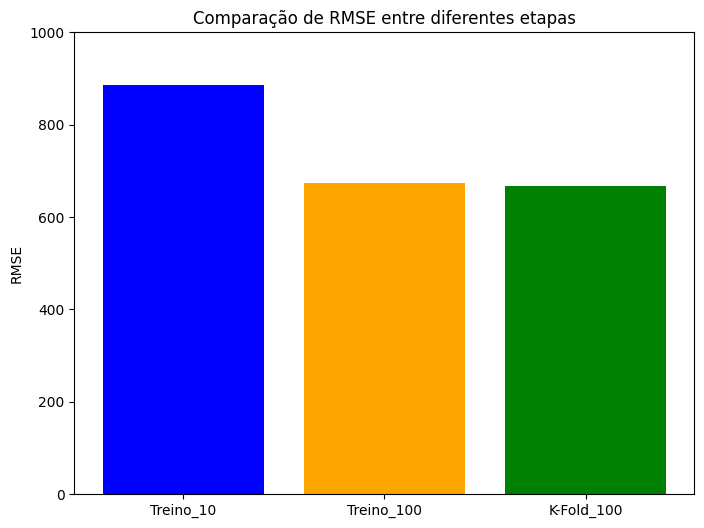

In [59]:
etapas = ['Treino_10', 'Treino_100' , 'K-Fold_100']
rmse_valores = [ 884.70, 672.59, 666.34]

plt.figure(figsize=(8, 6))
plt.bar(etapas, rmse_valores, color=['blue', 'orange', 'green'])
plt.ylabel('RMSE')
plt.title('Comparação de RMSE entre diferentes etapas')
plt.ylim(0, 1000)
plt.show()


Os resultados e a análise indicam que o modelo XGBoost está preparado para ser utilizado na produção.

In [74]:
xgb_resumo = {
    "Modelo": ["XGBoost (Base)", "XGBoost (Otimizado)"],
    "RMSE ": [1122.98, 884.70],
    "R²": [0.91, 0.95],
    "Tempo (s)": [8.77, 30.83]
}

resumo = pd.DataFrame(xgb_resumo)
resumo

,Modelo,RMSE,R²,Tempo (s)
0,XGBoost (Base),1122.98,0.91,8.77
1,XGBoost (Otimizado),884.70,0.95,30.83


#### 11.3 Dispersao dos resultados

Usando os dados de treino completos.

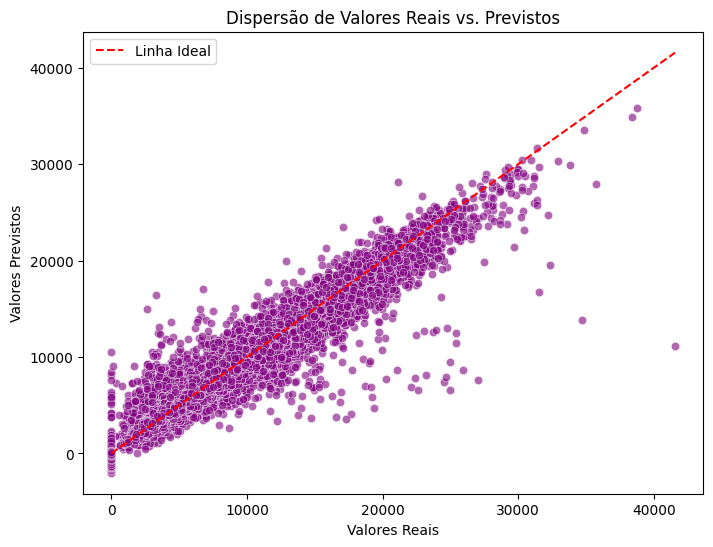

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val_modelo, y=y_val_pred_xgb_final, alpha=0.6, color='purple')
plt.plot([min(y_val_modelo), max(y_val_modelo)],
         [min(y_val_modelo), max(y_val_modelo)],
         color='red', linestyle='--', label='Linha Ideal')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Dispersão de Valores Reais vs. Previstos')
plt.legend()
plt.show()


## 12. Conclusao

**Resumo das análises**

O objetivo deste projeto foi prever as vendas diárias das lojas com base no histórico de vendas e outras características relevantes do dataset. Após a análise exploratória e o pré-processamento, selecionamos os modelos mais promissores e realizamos ajustes nos hiperparâmetros utilizando o K-Fold Cross-Validation. O XGBoost destacou-se como o melhor modelo em termos de equilíbrio entre desempenho e tempo de execução.

**Motivação para escolher o XGBoost:**

* *O XGBoost*  foi selecionado devido à sua otima combinação de precisão, estabilidade e eficiência, tornando-se a escolha ideal para lidar com os dados disponíveis.

* *Eficiência:* Apesar de apresentar tempos de execução maiores que o Linear Regression, ele ainda foi significativamente mais rápido que o Random Forest.

* *Flexibilidade:* A capacidade do XGBoost de ajustar hiperparâmetros e lidar com dados complexos torna-o uma escolha robusta para problemas de regressão.

**Dados do desempenho do modelo:**

A análise detalhada evidencia a evolução significativa do modelo ao longo do projeto:

* **22% de melhoria no RMSE:** o modelo otimizado passou de **1122.98** para **884.70**, resultando em previsões consideravelmente mais precisas.
* **5% de melhoria no R²:** o coeficiente de determinação foi elevado de **0.91** para **0.95**, reforçando a capacidade do modelo de explicar a variabilidade dos dados.
* **Estabilidade entre treino e validação:** os resultados consistentes indicam que o modelo não apresenta sinais de overfitting, assegurando sua capacidade de generalização.
* **Eficiência e desempenho:** embora o tempo de processamento do XGBoost otimizado tenha aumentado de **8.77s** para **30.83s**, o ganho em precisão justifica o esforço computacional adicional.

# Resultados para submissao do desafio

## Obtendo as previsoes de `X_test`

Com os resultados consistentes obtidos ate agora, o modelo passar pelo teste final, sera treinado com todo o dataset de treino completo e nao normalizado para obter as previsoes de `X_test`.

In [ ]:
xgb_final_100 = XGBRegressor(**melhores, random_state=42)
modelo_xgb_final_100 = xgb_final.fit(X_train, y_train)

y_pred_xgb_final = modelo_xgb_final.predict(X_test)

Tempo: 40.61 segundos


In [ ]:
y_final = np.round(y_pred_xgb_final) # A submissao necessita estar em numeros inteiros

In [ ]:
submission = pd.DataFrame({
    'Id': test['Id'],
    'Sales':  y_final
})

submission.to_csv('submission.csv', index=False)

print(submission.head(20))

    Id    Sales
0    1   4356.0
1    2   7396.0
2    3   9199.0
3    4   7467.0
4    5   7178.0
5    6   5654.0
6    7   8044.0
7    8   8116.0
8    9   5384.0
9   10   5542.0
10  11   7146.0
11  12   8331.0
12  13   7126.0
13  14   8847.0
14  15   5817.0
15  16   4731.0
16  17   5690.0
17  18  10114.0
18  19  10755.0
19  20  10112.0


In [ ]:
from google.colab import files
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>